## Imports

In [1]:
import polars as pl
import os

### Preparation

In [2]:
DATA_DIR = "labs/mlops_lab3/data"
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)

## 1. Data Reading

### Taxi Data

In [3]:
dfs = []
for month in range(1, 13):
    taxi_df = pl.scan_parquet(f"{DATA_DIR}/{month}.parquet")
    taxi_df = taxi_df.with_columns(
        pl.col("tpep_pickup_datetime").dt.cast_time_unit("ms"),
        pl.col("tpep_dropoff_datetime").dt.cast_time_unit("ms"),
    )
    dfs.append(taxi_df)

taxi_df_lazy: pl.DataFrame = pl.concat(dfs)
taxi_df_lazy.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.116972e7,"""41169720""","""41169720""",3.7078488e7,4.116972e7,3.7078488e7,"""37078488""",4.116972e7,4.116972e7,4.116972e7,4.116972e7,4.116972e7,4.116972e7,4.116972e7,4.116972e7,4.116972e7,4.116972e7,3.7078488e7,3.7078488e7
"""null_count""",0.0,"""0""","""0""",4.091232e6,0.0,4.091232e6,"""4091232""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091232e6,4.091232e6
"""mean""",1.764232,"""2024-07-06 10:01:25.051000""","""2024-07-06 10:18:53.125000""",1.333931,4.976101,2.32215,null,164.242786,163.447453,1.107259,19.26851,1.385953,0.479777,3.307884,0.561527,0.962993,27.832813,2.232144,0.147006
"""std""",0.425857,null,null,0.815824,419.230497,10.928049,null,64.340689,69.60009,0.651511,76.71984,1.815878,0.130183,4.090523,2.240545,0.255055,78.053586,0.874653,0.502041
"""min""",1.0,"""2002-12-31 16:46:07""","""2002-12-31 17:24:07""",0.0,0.0,1.0,"""N""",1.0,1.0,0.0,-2261.2,-9.25,-0.5,-300.0,-140.63,-1.0,-2265.45,-2.5,-1.75
"""25%""",2.0,"""2024-04-06 20:07:28""","""2024-04-06 20:23:52""",1.0,1.01,1.0,null,132.0,113.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.75,2.5,0.0
"""50%""",2.0,"""2024-07-03 23:35:16""","""2024-07-03 23:50:35""",1.0,1.76,1.0,null,161.0,162.0,1.0,13.5,1.0,0.5,2.6,0.0,1.0,21.0,2.5,0.0
"""75%""",2.0,"""2024-10-08 17:33:35""","""2024-10-08 17:53:27""",1.0,3.36,1.0,null,233.0,234.0,1.0,22.6,2.5,0.5,4.25,0.0,1.0,30.6,2.5,0.0
"""max""",7.0,"""2026-06-26 23:53:12""","""2026-06-27 20:59:10""",9.0,398608.62,99.0,"""Y""",265.0,265.0,5.0,335544.44,65.99,41.3,999.99,1702.88,2.0,335550.94,2.52,1.75


In [4]:
taxi_df = taxi_df_lazy.collect()
taxi_df.head(3)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i32,datetime[ms],datetime[ms],i64,f64,i64,str,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0


### Taxi Zone Data

In [5]:
taxi_zone_df = pl.read_csv(os.path.join(DATA_DIR, "taxi_zone_lookup.csv"))
taxi_zone_df.describe()

statistic,LocationID,Borough,Zone,service_zone
str,f64,str,str,str
"""count""",265.0,"""265""","""265""","""265"""
"""null_count""",0.0,"""0""","""0""","""0"""
"""mean""",133.0,null,null,null
"""std""",76.643112,null,null,null
"""min""",1.0,"""Bronx""","""Allerton/Pelham Gardens""","""Airports"""
"""25%""",67.0,null,null,null
"""50%""",133.0,null,null,null
"""75%""",199.0,null,null,null
"""max""",265.0,"""Unknown""","""Yorkville West""","""Yellow Zone"""


### Filter data to 2024 year only

In [6]:
taxi_df = taxi_df.filter(
    (
        (pl.col("tpep_pickup_datetime").dt.year() == 2024)
        | (
            (pl.col("tpep_pickup_datetime").dt.year() == 2025)
            & (pl.col("tpep_dropoff_datetime") <= pl.datetime(2025, 1, 1))
        )
    )
)
taxi_df.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.1169664e7,"""41169664""","""41169664""",3.7078432e7,4.1169664e7,3.7078432e7,"""37078432""",4.1169664e7,4.1169664e7,4.1169664e7,4.1169664e7,4.1169664e7,4.1169664e7,4.1169664e7,4.1169664e7,4.1169664e7,4.1169664e7,3.7078432e7,3.7078432e7
"""null_count""",0.0,"""0""","""0""",4.091232e6,0.0,4.091232e6,"""4091232""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091232e6,4.091232e6
"""mean""",1.764232,"""2024-07-06 10:09:57.955000""","""2024-07-06 10:27:25.996000""",1.33393,4.976099,2.322152,null,164.242801,163.447443,1.107259,19.268497,1.385952,0.479777,3.307883,0.561525,0.962993,27.832796,2.232145,0.147005
"""std""",0.425857,null,null,0.815824,419.230782,10.928057,null,64.340696,69.60009,0.651511,76.719887,1.815878,0.130183,4.090522,2.240541,0.255055,78.05363,0.874652,0.50204
"""min""",1.0,"""2024-01-01 00:00:00""","""2024-01-01 00:02:42""",0.0,0.0,1.0,"""N""",1.0,1.0,0.0,-2261.2,-9.25,-0.5,-300.0,-140.63,-1.0,-2265.45,-2.5,-1.75
"""25%""",2.0,"""2024-04-06 20:07:55""","""2024-04-06 20:24:09""",1.0,1.01,1.0,null,132.0,113.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.75,2.5,0.0
"""50%""",2.0,"""2024-07-03 23:35:39""","""2024-07-03 23:51:00""",1.0,1.76,1.0,null,161.0,162.0,1.0,13.5,1.0,0.5,2.6,0.0,1.0,21.0,2.5,0.0
"""75%""",2.0,"""2024-10-08 17:33:37""","""2024-10-08 17:53:30""",1.0,3.36,1.0,null,233.0,234.0,1.0,22.6,2.5,0.5,4.25,0.0,1.0,30.6,2.5,0.0
"""max""",7.0,"""2024-12-31 23:59:58""","""2025-01-01 22:59:33""",9.0,398608.62,99.0,"""Y""",265.0,265.0,5.0,335544.44,65.99,41.3,999.99,1702.88,2.0,335550.94,2.52,1.75


In [7]:
taxi_df.head(3)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i32,datetime[ms],datetime[ms],i64,f64,i64,str,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0


In [8]:
taxi_zone_df.select("service_zone").unique()

service_zone
str
"""Airports"""
"""Yellow Zone"""
"""N/A"""
"""EWR"""
"""Boro Zone"""


### Optimizing data

**taxi_df**

Changes:
- vendorId -> Categorical
- passenger_count -> uint8
- RatecodeId -> uint8
- store_and_fwd_flag -> Categorical
- PULocationID -> uint16
- DOLocationID -> uint16
- payment_type -> Categorical


**taxi_zone**

Changes:
- locationId -> uint16
- Borough -> Categorical
- service_zone -> Categorical

In [13]:
taxi_df.select("payment_type").unique()

payment_type
i64
3
0
4
1
2
5


In [14]:
taxi_df = taxi_df.with_columns(
    pl.col("VendorID").cast(pl.UInt8),
    pl.col("passenger_count").cast(pl.UInt8),
    pl.col("RatecodeID").cast(pl.UInt8),
    pl.col("store_and_fwd_flag").cast(pl.Categorical),
    pl.col("PULocationID").cast(pl.UInt16),
    pl.col("DOLocationID").cast(pl.UInt16),
    pl.col("payment_type").cast(pl.UInt8),
)


taxi_df.head(3)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,u16,u16,u8,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0


In [15]:
print(taxi_df.dtypes)

[UInt8, Datetime(time_unit='ms', time_zone=None), Datetime(time_unit='ms', time_zone=None), UInt8, Float64, UInt8, Categorical, UInt16, UInt16, UInt8, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64]


After .describe() the types in table are f64, but for dtypes, there are UInt8. 

### 

In [16]:
taxi_zone_df = taxi_zone_df.with_columns(
    pl.col("LocationID").cast(pl.UInt16),
    pl.col("Borough").cast(pl.Categorical),
    pl.col("service_zone").cast(pl.Categorical),
)

taxi_zone_df.describe()

statistic,LocationID,Borough,Zone,service_zone
str,f64,str,str,str
"""count""",265.0,"""265""","""265""","""265"""
"""null_count""",0.0,"""0""","""0""","""0"""
"""mean""",133.0,null,null,null
"""std""",76.643112,null,null,null
"""min""",1.0,null,"""Allerton/Pelham Gardens""",null
"""25%""",67.0,null,null,null
"""50%""",133.0,null,null,null
"""75%""",199.0,null,null,null
"""max""",265.0,null,"""Yorkville West""",null


## 2. Data filtering and cleaning

### Fill null passenger_count with 1

In [17]:
taxi_df = taxi_df.with_columns(pl.col("passenger_count").fill_null(1))

### remove rides with zero passengers


In [18]:
taxi_df = taxi_df.filter(pl.col("passenger_count") > 0)

### if a ride has over 6 passengers, replace the value with 6

In [19]:
taxi_df = taxi_df.with_columns(
    pl.when(pl.col("passenger_count") > 6)
    .then(6)
    .otherwise(pl.col("passenger_count"))
    .alias("passenger_count")
)

### remove rides lasting over 2 hours


In [20]:
taxi_df = taxi_df.filter(
    (pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime")).dt.total_hours()
    <= 2
)

### in all money-related columns, replace values with absolute value to fix negative amounts


In [21]:
money_cols = [
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "tolls_amount",
    "improvement_surcharge",
    "total_amount",
    "congestion_surcharge",
    "Airport_fee",
]

for col in money_cols:
    taxi_df = taxi_df.with_columns(pl.col(col).abs())

### remove rides with over 1000 dollars in any money-related column

In [22]:
for col in money_cols:
    taxi_df = taxi_df.filter(pl.col(col) < 1000)

### remove rows with values of RatecodeID or VendorID missing or outside those defined in the data dictionary


In [23]:
rate_codes = [1, 2, 3, 4, 5, 6, 99]
vendor_ids = [1, 2, 6, 7]

taxi_df = taxi_df.filter(
    (
        (
            (pl.col("RatecodeID").is_not_null())
            & (pl.col("RatecodeID").is_in(rate_codes))
        )
        & ((pl.col("VendorID").is_not_null()) & (pl.col("VendorID").is_in(vendor_ids)))
    )
)


### After Cleaning data

In [24]:
taxi_df.schema

Schema([('VendorID', UInt8),
        ('tpep_pickup_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('passenger_count', UInt8),
        ('trip_distance', Float64),
        ('RatecodeID', UInt8),
        ('store_and_fwd_flag', Categorical),
        ('PULocationID', UInt16),
        ('DOLocationID', UInt16),
        ('payment_type', UInt8),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64)])

### Saving as parquet to not process it again

Purpose of this is to start on the next time, to just load cleaned.

In [25]:
taxi_df.head(3)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,u16,u16,u8,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0


In [4]:
CLEAN_TAXI_DF_PATH = "labs/mlops_homework3/data/taxi_df.parquet"
CLEAN_TAXI_ZONES_DF_PATH = "labs/mlops_homework3/data/taxi_zones.parquet"

In [ ]:
taxi_df.write_parquet(CLEAN_TAXI_DF_PATH)
taxi_zone_df.write_parquet(CLEAN_TAXI_ZONES_DF_PATH)

In [6]:
taxi_zone_df = pl.read_parquet(CLEAN_TAXI_ZONES_DF_PATH)
taxi_df = pl.read_parquet(CLEAN_TAXI_DF_PATH)

In [30]:
taxi_df.head(3)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,u16,u16,u8,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0


## 3. Data transformation

### combine payment type values for "No charge", "Dispute", "Unknown" and "Voided trip" into one type, so we have only credit card, cash, or other

In [7]:
taxi_df = taxi_df.with_columns(
    pl.when(pl.col("payment_type") == 1)
    .then(pl.lit("Credit card"))
    .when(pl.col("payment_type") == 2)
    .then(pl.lit("Cash"))
    .otherwise(pl.lit("Other"))
    .alias("payment_type")
)

taxi_df.select("payment_type").unique()

payment_type
str
"""Cash"""
"""Credit card"""
"""Other"""


### replace PULocationID and DOLocationID with borough names by joining taxi zone lookup and removing unnecessary columns


In [8]:
taxi_df = (
    taxi_df.join(
        taxi_zone_df.select(["LocationID", "Borough"]),
        left_on="PULocationID",
        right_on="LocationID",
        how="left",
    )
    .rename({"Borough": "FromBorough"})
    .drop("PULocationID")
    .join(
        taxi_zone_df.select(["LocationID", "Borough"]),
        left_on="DOLocationID",
        right_on="LocationID",
        how="left",
    )
    .rename({"Borough": "ToBorough"})
    .drop("DOLocationID")
)

taxi_df.head(3)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,FromBorough,ToBorough
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,cat,cat
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""","""Cash""",17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,"""Manhattan""","""Manhattan"""
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""","""Credit card""",10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,"""Manhattan""","""Manhattan"""
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""","""Credit card""",23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0,"""Manhattan""","""Manhattan"""


### add boolean variable is_airport_ride, true if there is non-zero airport fee

In [9]:
taxi_df = taxi_df.with_columns(
    pl.when(pl.col("Airport_fee") > 0)
    .then(True)
    .otherwise(False)
    .alias("is_airport_ride")
)

taxi_df.head(2)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,FromBorough,ToBorough,is_airport_ride
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,cat,cat,bool
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""","""Cash""",17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,"""Manhattan""","""Manhattan""",false
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""","""Credit card""",10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,"""Manhattan""","""Manhattan""",false


### add boolean variable is_rush_hour, rush hours are defined as 6:30–9:30 and 15:30-20:00 during weekdays


In [10]:
taxi_df = taxi_df.with_columns(
    pl.when(pl.col("tpep_pickup_datetime").dt.weekday() < 5)
    .then(
        (
            (
                (
                    pl.col("tpep_pickup_datetime").dt.hour() * 60
                    + pl.col("tpep_pickup_datetime").dt.minute()
                ).is_between(6 * 60 + 30, 9 * 60 + 30)
            )
            | (
                (
                    pl.col("tpep_pickup_datetime").dt.hour() * 60
                    + pl.col("tpep_pickup_datetime").dt.minute()
                ).is_between(15 * 60 + 30, 20 * 60)
            )
        )
    )
    .otherwise(False)
    .alias("is_rush_hour")
)

taxi_df.head(2)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,FromBorough,ToBorough,is_airport_ride,is_rush_hour
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,cat,cat,bool,bool
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""","""Cash""",17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,"""Manhattan""","""Manhattan""",false,false
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""","""Credit card""",10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,"""Manhattan""","""Manhattan""",false,false


## 4. Feature extraction


### Renaming cols for consistence

In [14]:
taxi_dataset = taxi_df.rename(
    {
        "VendorID": "vendor_id",
        "tpep_pickup_datetime": "pickup_datetime",
        "tpep_dropoff_datetime": "dropoff_datetime",
        "passenger_count": "passenger_count",
        "trip_distance": "trip_distance",
        "RatecodeID": "rate_code",
        "store_and_fwd_flag": "store_and_forward_flag",
        "payment_type": "payment_type",
        "fare_amount": "fare_amount",
        "extra": "extra",
        "mta_tax": "mta_tax",
        "tip_amount": "tip_amount",
        "tolls_amount": "tolls_amount",
        "improvement_surcharge": "improvement_surcharge",
        "total_amount": "total_amount",
        "congestion_surcharge": "congestion_surcharge",
        "Airport_fee": "airport_fee",
        "FromBorough": "from_borough",
        "ToBorough": "to_borough",
        "is_airport_ride": "is_airport_ride",
        "is_rush_hour": "is_rush_hour",
    }
)

taxi_dataset.head(2)

vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_forward_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,from_borough,to_borough,is_airport_ride,is_rush_hour
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,cat,cat,bool,bool
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""","""Cash""",17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,"""Manhattan""","""Manhattan""",false,false
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""","""Credit card""",10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,"""Manhattan""","""Manhattan""",false,false


### apply dummy encoding to features
- payment type
- pickup borough
- dropoff borough


In [ ]:
taxi_dataset = taxi_dataset.to_dummies(
    columns=["payment_type", "from_borough", "to_borough"]
)
taxi_dataset.head(3)

vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_forward_flag,payment_type_Cash,payment_type_Credit card,payment_type_Other,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,from_borough_Bronx,from_borough_Brooklyn,from_borough_EWR,from_borough_Manhattan,from_borough_N/A,from_borough_Queens,from_borough_Staten Island,from_borough_Unknown,to_borough_Bronx,to_borough_Brooklyn,to_borough_EWR,to_borough_Manhattan,to_borough_N/A,to_borough_Queens,to_borough_Staten Island,to_borough_Unknown,is_airport_ride,is_rush_hour
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,u8,u8,u8,f64,f64,f64,f64,f64,f64,f64,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,bool,bool
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",1,0,0,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",0,1,0,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",0,1,0,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false


### add integer variables for counting daily events and add features aggregating daily rides information:


- total number of rides (target variable)
- number of airport rides
- number of rush hour rides


In [23]:
daily_data_df = (
    taxi_dataset.lazy()
    .with_columns(pl.col("pickup_datetime").dt.date().alias("ride_date"))
    .group_by("ride_date")
    .agg(
        pl.len().alias("total_rides"),
        pl.col("is_airport_ride").sum().alias("airport_rides"),
        pl.col("is_rush_hour").sum().alias("rush_hour_rides"),
        pl.col("fare_amount").mean().alias("average_fare_amount"),
        pl.col("trip_distance").mean().alias("average_distance"),
        pl.col("total_amount").sum().alias("total_amounts"),
        pl.col("congestion_surcharge").sum().alias("total_congestion_surcharge"),
        pl.col("passenger_count").sum().alias("total_passengers"),
        pl.col("total_amount")
        .filter(pl.col("payment_type_Cash") == 1)
        .sum()
        .alias("total_amount_by_cash"),
        pl.col("total_amount")
        .filter(pl.col("payment_type_Credit card") == 1)
        .sum()
        .alias("total_amount_by_card"),
        pl.col("total_amount")
        .filter(pl.col("payment_type_Other") == 1)
        .sum()
        .alias("total_amount_by_other"),
    )
    .collect()
)

daily_data_df.tail(3)

ride_date,total_rides,airport_rides,rush_hour_rides,average_fare_amount,average_distance,total_amounts,total_congestion_surcharge,total_passengers,total_amount_by_cash,total_amount_by_card,total_amount_by_other
date,u32,u32,u32,f64,f64,f64,f64,i64,f64,f64,f64
2024-10-29,115205,9852,0,20.378804,3.295926,3.4397e6,265773.5,145849,402115.11,2.9432e6,94387.08
2024-02-13,65972,5260,0,16.778934,3.072934,1.6873e6,153185.0,87060,240729.07,1.4046e6,41988.65
2024-02-16,97238,7820,0,19.080597,3.222458,2.7544e6,224397.5,132654,369485.31,2.3253e6,59696.58


### add time features, add column date, indicating day with given features


- quarter
- month
- day_of_month
- day_of_week
- is_weekend (boolean)

In [24]:
taxi_dataset = (
    taxi_dataset.lazy()
    .with_columns(
        [
            pl.col("pickup_datetime").dt.date().alias("ride_date"),
            pl.col("pickup_datetime").dt.quarter().alias("quarter"),
            pl.col("pickup_datetime").dt.month().alias("month"),
            pl.col("pickup_datetime").dt.day().alias("day_of_month"),
            pl.col("pickup_datetime").dt.weekday().alias("day_of_week"),
            (pl.col("pickup_datetime").dt.weekday() >= 5).alias("is_weekend"),
        ]
    )
    .collect()
)

In [25]:
taxi_dataset.head(3)

vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_forward_flag,payment_type_Cash,payment_type_Credit card,payment_type_Other,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,from_borough_Bronx,from_borough_Brooklyn,from_borough_EWR,from_borough_Manhattan,from_borough_N/A,from_borough_Queens,from_borough_Staten Island,from_borough_Unknown,to_borough_Bronx,to_borough_Brooklyn,to_borough_EWR,to_borough_Manhattan,to_borough_N/A,to_borough_Queens,to_borough_Staten Island,to_borough_Unknown,is_airport_ride,is_rush_hour,ride_date,quarter,month,day_of_month,day_of_week,is_weekend
u8,datetime[ms],datetime[ms],u8,f64,u8,cat,u8,u8,u8,f64,f64,f64,f64,f64,f64,f64,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,bool,bool,date,i8,i8,i8,i8,bool
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",1,0,0,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",0,1,0,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",0,1,0,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false


### make sure to exclude other columns, unnecessary for machine learning, e.g. IDs, timestamps, unused financial information


In [28]:
taxi_dataset = taxi_dataset.drop(
    [
        "vendor_id",
        "pickup_datetime",
        "dropoff_datetime",
        "fare_amount",
        "extra",
        "mta_tax",
        "tolls_amount",
        "improvement_surcharge",
        "airport_fee",
        "congestion_surcharge",
    ]
)

taxi_dataset.head(3)

passenger_count,trip_distance,rate_code,store_and_forward_flag,payment_type_Cash,payment_type_Credit card,payment_type_Other,tip_amount,total_amount,from_borough_Bronx,from_borough_Brooklyn,from_borough_EWR,from_borough_Manhattan,from_borough_N/A,from_borough_Queens,from_borough_Staten Island,from_borough_Unknown,to_borough_Bronx,to_borough_Brooklyn,to_borough_EWR,to_borough_Manhattan,to_borough_N/A,to_borough_Queens,to_borough_Staten Island,to_borough_Unknown,is_airport_ride,is_rush_hour,ride_date,quarter,month,day_of_month,day_of_week,is_weekend
u8,f64,u8,cat,u8,u8,u8,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,bool,bool,date,i8,i8,i8,i8,bool
1,1.72,1,"""N""",1,0,0,0.0,22.7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false
1,1.8,1,"""N""",0,1,0,3.75,18.75,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false
1,4.7,1,"""N""",0,1,0,3.0,31.3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false


### properly name all columns

Done above

### save results as dataset.parquet file


In [ ]:
TAXI_DATASET = os.path.join(DATA_DIR, "dataset.parquet")
TAXI_DAILY_DATASET = os.path.join(DATA_DIR, "daily_dataset.parquet")

taxi_dataset.write_parquet(TAXI_DATASET)
daily_data_df.write_parquet(TAXI_DAILY_DATASET)

# NOTE That 2 datasets, one daily aggregated, another per ride

## 5. Data analysis

In [34]:
print(f"taxi_dataset.shape={taxi_dataset.shape}")
print(f"daily_data_df.shape={daily_data_df.shape}")

taxi_dataset.shape=(36651941, 33)
daily_data_df.shape=(366, 12)


In [35]:
daily_data_df.head(5)

ride_date,total_rides,airport_rides,rush_hour_rides,average_fare_amount,average_distance,total_amounts,total_congestion_surcharge,total_passengers,total_amount_by_cash,total_amount_by_card,total_amount_by_other
date,u32,u32,u32,f64,f64,f64,f64,i64,f64,f64,f64
2024-12-13,141501,10044,0,19.908724,3.071592,4.1609e6,330525.0,189881,425204.44,3.6191e6,116579.13
2024-08-04,77023,10778,0,22.115171,6.798165,2.3990e6,170932.5,111685,333662.49,1.9793e6,86016.1
2024-04-16,101734,8729,0,19.789107,3.319102,2.9674e6,234442.5,130878,381459.7,2.5219e6,64008.03
2024-12-07,130675,7820,0,19.474376,2.988881,3.6329e6,306916.0,189293,429783.76,3.0791e6,123977.41
2024-03-17,88215,10124,0,21.239526,3.968873,2.6896e6,201272.5,123739,354618.88,2.2685e6,66452.97


In [31]:
taxi_dataset.head(5)

passenger_count,trip_distance,rate_code,store_and_forward_flag,payment_type_Cash,payment_type_Credit card,payment_type_Other,tip_amount,total_amount,from_borough_Bronx,from_borough_Brooklyn,from_borough_EWR,from_borough_Manhattan,from_borough_N/A,from_borough_Queens,from_borough_Staten Island,from_borough_Unknown,to_borough_Bronx,to_borough_Brooklyn,to_borough_EWR,to_borough_Manhattan,to_borough_N/A,to_borough_Queens,to_borough_Staten Island,to_borough_Unknown,is_airport_ride,is_rush_hour,ride_date,quarter,month,day_of_month,day_of_week,is_weekend
u8,f64,u8,cat,u8,u8,u8,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,bool,bool,date,i8,i8,i8,i8,bool
1,1.72,1,"""N""",1,0,0,0.0,22.7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false
1,1.8,1,"""N""",0,1,0,3.75,18.75,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false
1,4.7,1,"""N""",0,1,0,3.0,31.3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false
1,1.4,1,"""N""",0,1,0,2.0,17.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false
1,0.8,1,"""N""",0,1,0,3.2,16.1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,false,false,2024-01-01,1,1,1,1,false


In [32]:
taxi_dataset.describe()

statistic,passenger_count,trip_distance,rate_code,store_and_forward_flag,payment_type_Cash,payment_type_Credit card,payment_type_Other,tip_amount,total_amount,from_borough_Bronx,from_borough_Brooklyn,from_borough_EWR,from_borough_Manhattan,from_borough_N/A,from_borough_Queens,from_borough_Staten Island,from_borough_Unknown,to_borough_Bronx,to_borough_Brooklyn,to_borough_EWR,to_borough_Manhattan,to_borough_N/A,to_borough_Queens,to_borough_Staten Island,to_borough_Unknown,is_airport_ride,is_rush_hour,ride_date,quarter,month,day_of_month,day_of_week,is_weekend
str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64
"""count""",3.6651941e7,3.6651941e7,3.6651941e7,"""36651941""",3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,"""36651941""",3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7,3.6651941e7
"""null_count""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",1.348256,3.508593,2.314405,null,0.149105,0.821602,0.029294,3.596618,29.113593,0.002094,0.00889,0.00016,0.884001,0.000602,0.101105,0.000026,0.003123,0.005932,0.040117,0.002846,0.889345,0.004885,0.052136,0.000253,0.004485,0.089775,0.0,"""2024-07-05 02:44:45.786425""",2.540021,6.636625,15.621464,3.989754,0.419645
"""std""",0.807448,85.840687,10.893353,null,0.356192,0.382848,0.168629,4.148354,23.639274,0.045716,0.093867,0.012634,0.320224,0.02453,0.301467,0.005086,0.055795,0.07679,0.196233,0.053268,0.313704,0.069722,0.222302,0.015917,0.066822,null,null,null,1.125072,3.461932,8.697241,1.933215,null
"""min""",1.0,0.0,1.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""2024-01-01""",1.0,1.0,1.0,1.0,0.0
"""25%""",1.0,1.0,1.0,null,0.0,1.0,0.0,1.0,15.96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,null,null,"""2024-04-05""",2.0,4.0,8.0,2.0,null
"""50%""",1.0,1.7,1.0,null,0.0,1.0,0.0,2.86,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,null,null,"""2024-07-03""",3.0,7.0,16.0,4.0,null
"""75%""",1.0,3.28,1.0,null,0.0,1.0,0.0,4.45,31.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,null,null,"""2024-10-08""",4.0,10.0,23.0,6.0,null
"""max""",6.0,160244.91,99.0,null,1.0,1.0,1.0,747.47,999.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,"""2024-12-31""",4.0,12.0,31.0,7.0,1.0


In [36]:
daily_data_df.describe()

statistic,ride_date,total_rides,airport_rides,rush_hour_rides,average_fare_amount,average_distance,total_amounts,total_congestion_surcharge,total_passengers,total_amount_by_cash,total_amount_by_card,total_amount_by_other
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""366""",366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2024-07-01 12:00:00""",100141.915301,8990.199454,0.0,19.980507,3.54219,2.9155e6,230239.359344,135016.945355,373328.374754,2.4637e6,78429.164945
"""std""",null,15389.315534,1720.291197,0.0,1.210568,0.551708,463485.679415,37878.95429,18739.908913,36500.436851,430470.311473,17405.019591
"""min""","""2024-01-01""",47394.0,3356.0,0.0,16.691075,2.767982,1.3262e6,107827.5,74202.0,240729.07,996620.34,41303.84
"""25%""","""2024-04-01""",89621.0,7871.0,0.0,19.139729,3.226801,2.5851e6,203506.0,122264.0,352859.1,2.1718e6,65782.48
"""50%""","""2024-07-02""",100793.0,9033.0,0.0,20.001156,3.38899,2.9217e6,232892.5,134113.0,376665.61,2.4668e6,79736.24
"""75%""","""2024-10-01""",110862.0,10147.0,0.0,20.731037,3.753691,3.2249e6,256977.0,147295.0,400186.16,2.7469e6,90710.19
"""max""","""2024-12-31""",141966.0,14929.0,0.0,24.476789,7.92771,4.4927e6,330525.0,199496.0,451228.63,3.9404e6,123977.41


In [33]:
taxi_dataset.schema

Schema([('passenger_count', UInt8),
        ('trip_distance', Float64),
        ('rate_code', UInt8),
        ('store_and_forward_flag', Categorical),
        ('payment_type_Cash', UInt8),
        ('payment_type_Credit card', UInt8),
        ('payment_type_Other', UInt8),
        ('tip_amount', Float64),
        ('total_amount', Float64),
        ('from_borough_Bronx', UInt8),
        ('from_borough_Brooklyn', UInt8),
        ('from_borough_EWR', UInt8),
        ('from_borough_Manhattan', UInt8),
        ('from_borough_N/A', UInt8),
        ('from_borough_Queens', UInt8),
        ('from_borough_Staten Island', UInt8),
        ('from_borough_Unknown', UInt8),
        ('to_borough_Bronx', UInt8),
        ('to_borough_Brooklyn', UInt8),
        ('to_borough_EWR', UInt8),
        ('to_borough_Manhattan', UInt8),
        ('to_borough_N/A', UInt8),
        ('to_borough_Queens', UInt8),
        ('to_borough_Staten Island', UInt8),
        ('to_borough_Unknown', UInt8),
        ('is_airport_ri

In [37]:
daily_data_df.schema

Schema([('ride_date', Date),
        ('total_rides', UInt32),
        ('airport_rides', UInt32),
        ('rush_hour_rides', UInt32),
        ('average_fare_amount', Float64),
        ('average_distance', Float64),
        ('total_amounts', Float64),
        ('total_congestion_surcharge', Float64),
        ('total_passengers', Int64),
        ('total_amount_by_cash', Float64),
        ('total_amount_by_card', Float64),
        ('total_amount_by_other', Float64)])

### Plots

In [40]:
import matplotlib.pyplot as plt

In [39]:
daily_data_df = daily_data_df.sort(by="ride_date")

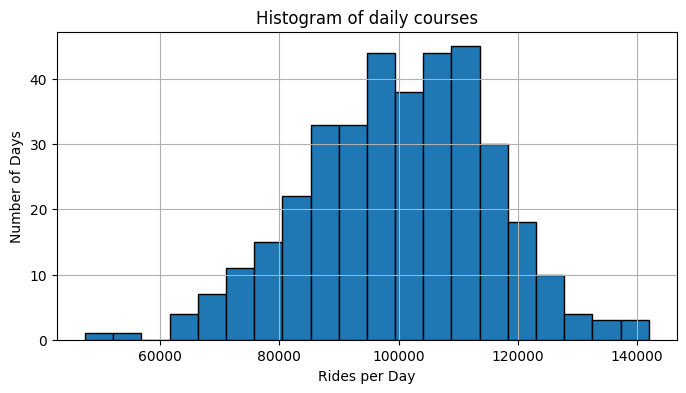

In [47]:
plt.figure(figsize=(8, 4))
plt.title("Histogram of daily courses")
plt.hist(daily_data_df["total_rides"], bins=20, edgecolor="black")
plt.xlabel("Rides per Day")
plt.ylabel("Number of Days")
plt.grid()
plt.show()

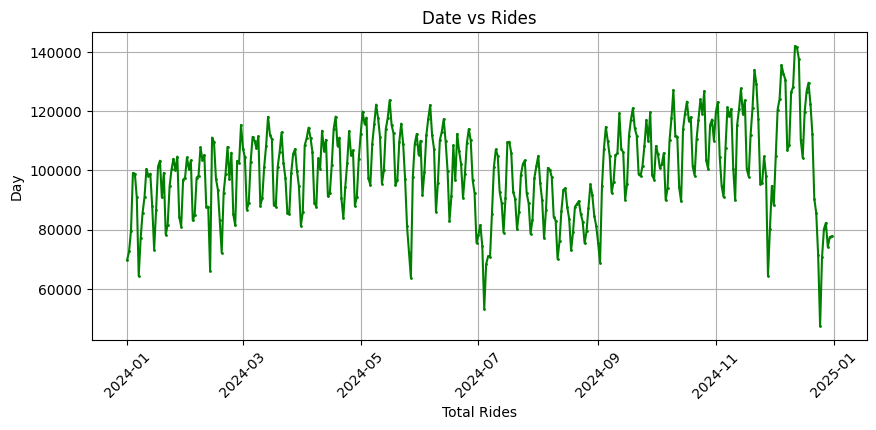

In [54]:
plt.figure(figsize=(10, 4))
plt.title("Date vs Rides")
plt.plot(
    daily_data_df["ride_date"],
    daily_data_df["total_rides"],
    marker="o",
    c="g",
    markersize=1,
)
plt.xlabel("Total Rides")
plt.ylabel("Day")
plt.tick_params(axis="x", rotation=45)
plt.grid()
plt.show()